In [2]:
!pip install fastai
!pip install -U pyarrow

import numpy as np
import pandas as pd
import seaborn as sns

import requests
import ast
import os
import gc
import matplotlib.pyplot as plt

from fastai.vision import *
from fastai.metrics import error_rate, accuracy

     |████████████████████████████████| 48.5MB 1.0MB/s 


In [3]:
# Will need to login to access the bucket. The following lines of code do just that
from google.colab import auth
auth.authenticate_user()

# List out all the files in the directory (Make sure that we are logged in)
gs_path = 'platform-ai-research/datasets/ProductNet/'
!gsutil ls gs://{gs_path}

gs://platform-ai-research/datasets/ProductNet/crawl-300d-2M.vec
gs://platform-ai-research/datasets/ProductNet/df2_20000
gs://platform-ai-research/datasets/ProductNet/df2_clean_THRESHOLD_5_4
gs://platform-ai-research/datasets/ProductNet/df2_clean_THRESHOLD_7
gs://platform-ai-research/datasets/ProductNet/df2_clean_THRESHOLD_7_2
gs://platform-ai-research/datasets/ProductNet/df2_clean_THRESHOLD_7_3
gs://platform-ai-research/datasets/ProductNet/labels_5m
gs://platform-ai-research/datasets/ProductNet/metadata.feather
gs://platform-ai-research/datasets/ProductNet/metadata_clean_0513
gs://platform-ai-research/datasets/ProductNet/taxonomy-with-ids.en-US.xls
gs://platform-ai-research/datasets/ProductNet/urls_20000
gs://platform-ai-research/datasets/ProductNet//
gs://platform-ai-research/datasets/ProductNet/images/
gs://platform-ai-research/datasets/ProductNet/kn_models/
gs://platform-ai-research/datasets/ProductNet/mapped_label_temp_files/
gs://platform-ai-research/datasets/ProductNet/metadata_t

Run the following only once.

In [4]:
# Pull from GS
gs_path = 'platform-ai-research/datasets/ProductNet/'
file_name = 'urls_20000'

remote_file = gs_path + file_name
!gsutil cp gs://{remote_file} {file_name} 

# read from local
url_df = pd.read_feather('urls_20000')

Copying gs://platform-ai-research/datasets/ProductNet/urls_20000...
- [1 files][  1.5 MiB/  1.5 MiB]                                                
Operation completed over 1 objects/1.5 MiB.                                      


In [0]:
# Next step is to download the images
if (not os.path.exists('./images_folder/')):
    !mkdir 'images_folder'

from tqdm import tqdm

# imUrls = url_df.imUrl.tolist()
# asins = url_df.asin.tolist()

In [6]:
# Pull from GS
gs_path = 'platform-ai-research/datasets/ProductNet/'
file_name = 'df2_20000'

remote_file = gs_path + file_name
!gsutil cp gs://{remote_file} {file_name} 

df2 = pd.read_feather('df2_20000')

Copying gs://platform-ai-research/datasets/ProductNet/df2_20000...
/ [1 files][691.6 KiB/691.6 KiB]                                                
Operation completed over 1 objects/691.6 KiB.                                    


In [19]:
select = ['Shoes', 'Clothing', 'Personal Care',
          'Backpacks', 'Vehicle Parts & Accessories',
          'Toys', 'Sofas', 'Puzzles',
          'Jewelry', 'Lawn & Garden']

select_df = df2[df2['label'].isin(select)]

select_df.head()

,asin,label
19,B001RZ4B7K,Vehicle Parts & Accessories
30,B005TU6MJ4,Sofas
33,B00G0Q0GP2,Clothing
47,B004SZGHGO,Shoes
61,B001KW0BYW,Sofas


In [23]:
len(select_df)

1440

In [21]:
df_label_url = pd.merge(select_df, url_df,
                        left_on='asin', right_on='asin',
                        how='inner')

df_label_url.head()

,asin,label,imUrl
0,B001RZ4B7K,Vehicle Parts & Accessories,http://ecx.images-amazon.com/images/I/31NwFq-T...
1,B005TU6MJ4,Sofas,http://ecx.images-amazon.com/images/I/510HRpu1...
2,B00G0Q0GP2,Clothing,http://ecx.images-amazon.com/images/I/41TZSOrm...
3,B004SZGHGO,Shoes,http://ecx.images-amazon.com/images/I/31sdKgz0...
4,B001KW0BYW,Sofas,http://ecx.images-amazon.com/images/I/41va%2Bn...


In [0]:
imUrls = df_label_url.imUrl.tolist()
labels = df_label_url.label.tolist()
asins = df_label_url.asin.tolist()

In [41]:
select

['Shoes',
 'Clothing',
 'Personal Care',
 'Backpacks',
 'Vehicle Parts & Accessories',
 'Toys',
 'Sofas',
 'Puzzles',
 'Jewelry',
 'Lawn & Garden']

In [0]:
# %%time
# for url_label_id in tqdm(zip(imUrls, labels, asins)):
#     url = url_label_id[0] # url of image
#     label = url_label_id[1].split(' ')[0] # label
#     asin = url_label_id[2] # asin of image
    
#     filename = label + '/' + asin + '.jpg'    
    
#     print(filename)       
  
#     # also check if file exists. If it does, do not reload it!
#     if (not os.path.isfile(filename)):
#         try:
#             r = requests.get(url, allow_redirects=True)
#             open(filename, 'wb').write(r.content)
            
#         except Exception as e:
#             select_df = select_df[select_df.asin != asin]           # if missing, remove from dataset
#             with open("./missing_select_df.txt", "a") as f:
#                 f.write(asin+'\n')                

In [0]:
# # Push to GS
# gs_path = 'platform-ai-research/datasets/ProductNet/'
# file_name = 'images_folder'

# remote_file = gs_path + file_name
# !gsutil cp -r {file_name} gs://{remote_file} 

In [0]:
# Download the file.
# !gsutil cp -r {file_name} gs://{remote_file} 
# !gsutil cp gs://{bucket_name}/to_upload.txt /tmp/gsutil_download.txt
  
# !gsutil cp gs://{remote_file} {file_name}
  
# Print the result to make sure the transfer worked.
# !cat {file_name}

# !zip -r images_folder.zip images_folder

In [0]:
# from google.colab import files

# files.download('images_folder.zip')

In [7]:
# from PIL import Image

# for url_id in tqdm(zip(imUrls, asins)):
#     url = url_id[0] # url of image
#     asin = url_id[1] # asin of image
#     filename = './images/' + asin + '.jpg'
    
#     try:
#         img = Image.open(filename)
#     except Exception as e:
#         df2 = df2[df2.asin != asin]           # if missing, remove from dataset
#         with open("./missing_imgs.txt", "a") as f:
#             f.write(asin+'\n')

20000it [00:01, 12285.90it/s]


In [0]:
# df2 = pd.read_feather('./df2_clean_THRESHOLD_5_4')

# df2.head()

After labeling the iamges using platform.ai, we now relabel the 1440 images from `select_df`. 

The uploaded file is called `ProductNet_small_prediction.csv`.

In [0]:
predictions = pd.read_csv('ProductNet_small_prediction.csv')

In [73]:
predictions.head()

,file_name,labeled_class,predicted_class,prediction_confidence,image_url
B007GF1OIE.jpg,personal,personal,0.876377,https://lh3.googleusercontent.com/lh4bPksUeBu7...,NaN
B002IC16Q0.jpg,sofas,sofas,0.999956,https://lh3.googleusercontent.com/I9NOtYJHusUD...,NaN
B005MQLE9S.jpg,shoes,shoes,0.999533,https://lh3.googleusercontent.com/rw_qbUnz-SI9...,NaN
B003UUM3IO.jpg,shoes,shoes,0.999984,https://lh3.googleusercontent.com/Zq2SAkotA7lB...,NaN
B004W360SW.jpg,shoes,shoes,0.448247,https://lh3.googleusercontent.com/KLl6ckVFNi_s...,NaN


In [76]:
predictions = predictions.reset_index()

predictions = predictions.rename(columns={'index': 'asin'})

predictions['asin'] = predictions['asin'].str.strip('.jpg')

predictions.head()

,asin,file_name,labeled_class,predicted_class,prediction_confidence,image_url
0,B007GF1OIE.jpg,personal,personal,0.876377,https://lh3.googleusercontent.com/lh4bPksUeBu7...,NaN
1,B002IC16Q0.jpg,sofas,sofas,0.999956,https://lh3.googleusercontent.com/I9NOtYJHusUD...,NaN
2,B005MQLE9S.jpg,shoes,shoes,0.999533,https://lh3.googleusercontent.com/rw_qbUnz-SI9...,NaN
3,B003UUM3IO.jpg,shoes,shoes,0.999984,https://lh3.googleusercontent.com/Zq2SAkotA7lB...,NaN
4,B004W360SW.jpg,shoes,shoes,0.448247,https://lh3.googleusercontent.com/KLl6ckVFNi_s...,NaN


In [80]:
# merge with select_df
final = pd.merge(select_df, predictions,
                 left_on='asin', right_on='asin',
                 how='inner')

final.head()

,asin,label,file_name,labeled_class,predicted_class,prediction_confidence,image_url
0,B004SZGHGO,Shoes,shoes,shoes,0.999872,https://lh3.googleusercontent.com/8qkO3A-jVlkt...,NaN
1,B000J2ODDY,Jewelry,lawn,lawn,0.913806,https://lh3.googleusercontent.com/EBvX7Sc2XjOx...,NaN
2,B004HEWZ6C,Clothing,clothing,clothing,0.747097,https://lh3.googleusercontent.com/a-LrYk7BmLtW...,NaN
3,B001CS69L8,Clothing,clothing,clothing,0.999759,https://lh3.googleusercontent.com/ZP9s2n2SDNWn...,NaN
4,B001CPK8I6,Shoes,shoes,shoes,0.999976,https://lh3.googleusercontent.com/JRM4UNgpg3Ea...,NaN


In [0]:
# len(final) # 999

In [0]:
df_new_label = final[['asin', 'file_name']].copy()

df_new_label.to_feather('df_new_label')

In [85]:
df_new_label.head()

,asin,file_name
0,B004SZGHGO,shoes
1,B000J2ODDY,lawn
2,B004HEWZ6C,clothing
3,B001CS69L8,clothing
4,B001CPK8I6,shoes


In [87]:
# get the latest images
df_new_label_urls = pd.merge(df_new_label, url_df,
                             left_on='asin', right_on='asin',
                             how='inner')

df_new_label_urls.head()

,asin,file_name,imUrl
0,B004SZGHGO,shoes,http://ecx.images-amazon.com/images/I/31sdKgz0...
1,B000J2ODDY,lawn,http://ecx.images-amazon.com/images/I/41YRAVPT...
2,B004HEWZ6C,clothing,http://ecx.images-amazon.com/images/I/41SuH8ym...
3,B001CS69L8,clothing,http://ecx.images-amazon.com/images/I/41uOqky0...
4,B001CPK8I6,shoes,http://ecx.images-amazon.com/images/I/41IwhJIH...


In [0]:
imUrls = df_new_label_urls['imUrl'].tolist()
asins = df_new_label_urls['asin'].tolist()

In [0]:
# Next step is to download the images
if (not os.path.exists('./images_999/')):
    !mkdir 'images_999'

In [100]:
%%time
for url_id in zip(imUrls, asins):
    url = url_id[0] # url of image
    asin = url_id[1] # asin of image
    
    filename = 'images_999/' + asin + '.jpg'    
  
    # also check if file exists. If it does, do not reload it!
    if (not os.path.isfile(filename)):
        try:
            r = requests.get(url, allow_redirects=True)
            open(filename, 'wb').write(r.content)
            
        except Exception as e:
            df_new_label = df_new_label[df_new_label.asin != asin]           # if missing, remove from dataset
            with open("./new_missing_select_df.txt", "a") as f:
                f.write(asin+'\n')

CPU times: user 3.51 ms, sys: 4.78 ms, total: 8.29 ms
Wall time: 9.5 ms


In [0]:
# # push to GS
# gs_path = 'platform-ai-research/datasets/ProductNet/'
# file_name = 'df_new_label'

# remote_file = gs_path + file_name
# !gsutil cp {file_name} gs://{remote_file} 
  
# file_name = 'images_999'
# remote_file = gs_path + file_name
# !gsutil cp -r {file_name} gs://{remote_file} 

Our final working `df` is `df_new_label`. It contains 999 entries and 10 classes. The folder we store the images is `images_999`. These can be found in the GS bucket.

Rerun from here after cleaning the labels.

In [106]:
df_new_label.dropna(inplace=True)

print('len of df:', len(df_new_label))

len of df: 998


In [0]:
np.random.seed(42)

tfms = get_transforms(max_lighting=0.1, max_zoom=1.05, max_warp=0.)

src = ImageDataBunch.from_df('./', 
                             df_new_label, 
                             folder='images_999', 
                             suffix='.jpg', 
                             ds_tfms=tfms, 
                             size=224, 
                             bs=64).normalize(imagenet_stats)

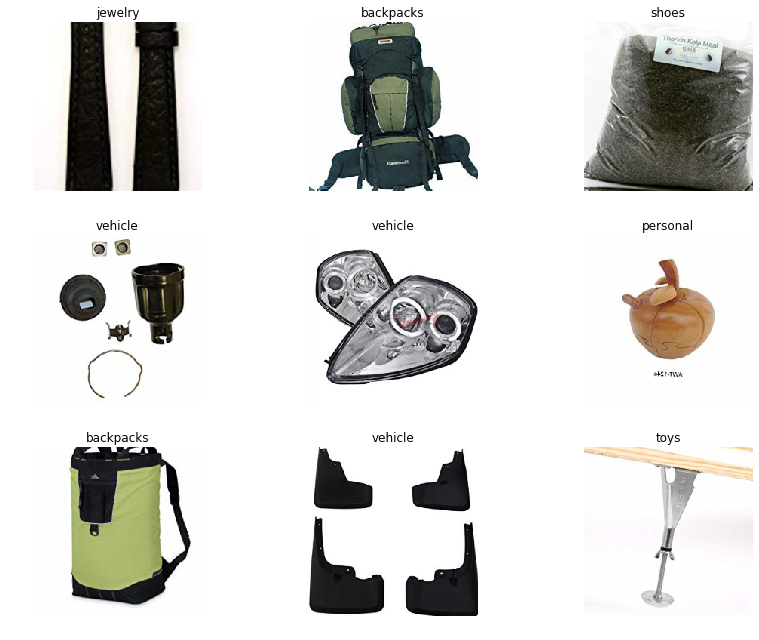

In [108]:
src.show_batch(rows=3, figsize=(12,9))

In [110]:
# # print(src.classes)
len(src.classes)

10

In [112]:
df_new_label.head()

,asin,file_name
0,B004SZGHGO,shoes
1,B000J2ODDY,lawn
2,B004HEWZ6C,clothing
3,B001CS69L8,clothing
4,B001CPK8I6,shoes


In [113]:
len(src.train_ds), len(src.valid_ds), len(src.train_ds)+len(src.valid_ds)

(799, 199, 998)

In [0]:
learn = cnn_learner(src, models.resnet50, metrics=error_rate)

In [120]:
gc.collect()

332

In [121]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.189808,1.373185,0.422111,00:07
1,1.509579,1.126954,0.356784,00:08
2,1.124021,1.065911,0.336683,00:08
3,0.885844,1.018724,0.306533,00:08
4,0.722260,1.045526,0.321608,00:09
5,0.597420,1.035040,0.326633,00:08
6,0.493822,1.063845,0.311558,00:08
7,0.410676,1.059759,0.326633,00:09
8,0.348353,1.062062,0.316583,00:08
9,0.302196,1.055811,0.306533,00:08


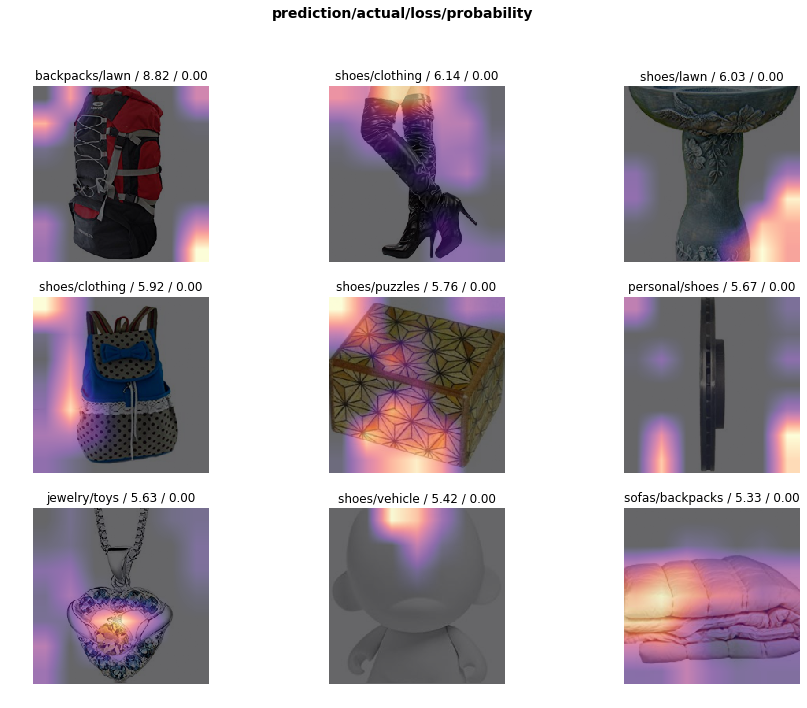

In [122]:
interp_valid = ClassificationInterpretation.from_learner(learn)
interp_valid.plot_top_losses(9, figsize=(15,11))

In [0]:
learn.unfreeze()

In [124]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.146463,1.335959,0.311558,00:11
1,0.140664,1.498022,0.301508,00:10
2,0.189289,2.242765,0.417085,00:10
3,0.285368,1.936025,0.417085,00:10
4,0.320479,1.655744,0.351759,00:10
5,0.296825,1.832916,0.351759,00:10
6,0.254704,1.279529,0.311558,00:10
7,0.209557,1.157753,0.316583,00:10
8,0.171421,1.188705,0.326633,00:10
9,0.141119,1.199823,0.326633,00:10


In [125]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: ignored

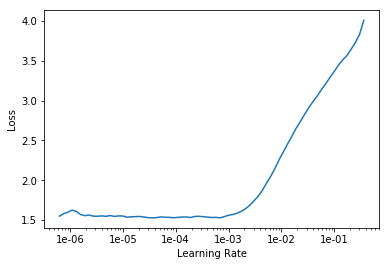

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, 5e-4)

epoch,train_loss,valid_loss,error_rate,time
0,1.980276,3.444555,0.760363,05:02
1,2.363433,3.061197,0.694776,05:04
2,1.669480,2.736318,0.634299,05:03
3,1.089262,2.670550,0.622374,05:03


# Clean bad labels
Since some of the labels (not predictions) are wrong in the first place, we propose discarding the samples with wrong labels based on the losses by the model. We start with a threshold of 7 since the highest loss was around 10.

In [0]:
losses_train, idxs_train = interp_train.top_losses()
losses_valid, idxs_valid = interp_valid.top_losses()

In [0]:
THRESHOLD = 5

train_bad_labels_idx = []
valid_bad_labels_idx = []

for loss, idx in zip(losses_train, idxs_train):
    if loss > THRESHOLD:
        train_bad_labels_idx.append(idx)
        
for loss, idx in zip(losses_valid, idxs_valid):
    if loss > THRESHOLD:
        valid_bad_labels_idx.append(idx)

In [0]:
len(train_bad_labels_idx), len(valid_bad_labels_idx)

(1180, 656)

In [0]:
train = src.train_ds.x.items[:]
valid = src.valid_ds.x.items[:]

train_bad_asin = []
valid_bad_asin = []

for idx in train_bad_labels_idx:
    img_name_path = train[idx]
    asin = str(img_name_path).strip('.jpg').strip('/images')
    train_bad_asin.append(asin)
    
for idx in valid_bad_labels_idx:
    img_name_path = valid[idx]
    asin = str(img_name_path).strip('.jpg').strip('/images')
    valid_bad_asin.append(asin)    

In [0]:
len(train_bad_asin), len(valid_bad_asin)

(1180, 656)

In [0]:
print('len before:', len(df2))

df2 = df2[~df2['asin'].isin(train_bad_asin)].copy()
df2 = df2[~df2['asin'].isin(valid_bad_asin)].copy()

print('len after:', len(df2))

len before: 19448
len after: 17612


In [0]:
df2 = df2.reset_index(drop=True)

df2.to_feather('df2_clean_THRESHOLD_5_4')

In [0]:
# Push to GS
gs_path = 'platform-ai-research/datasets/ProductNet/'
file_name = 'df2_clean_THRESHOLD_5_4'

remote_file = gs_path + file_name
!gsutil cp {file_name} gs://{remote_file} 

Copying file://df2_clean_THRESHOLD_5_4 [Content-Type=application/octet-stream]...
-
Operation completed over 1 objects/607.5 KiB.                                    
